# Task 1: Principle component analysis - Part 3

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

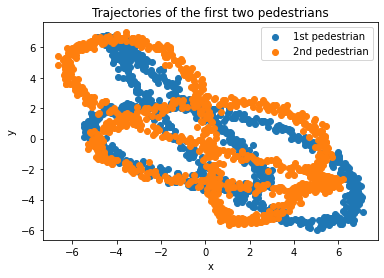

In [2]:
# load dataset
data = np.loadtxt(fname="data_DMAP_PCA_vadere.txt")
#print(data) #use these to check whether the data is properly loaded
#print(np.shape(data))

#reshape dataset (just renaming in this case) and center the data
X = data
X = X-X.mean(0)

# plot the trajectories of the first two pedestrians
plt.scatter(X[:, 0], X[:, 1], label='1st pedestrian')#pedestrian 1
plt.scatter(X[:, 2], X[:, 3], label='2nd pedestrian')#pedestrian 2
plt.title('Trajectories of the first two pedestrians')
plt.xlabel('x')
plt.ylabel('y')
plt.legend();

In [3]:
# singular value decomposition
U, sigma, VT = np.linalg.svd(X,0)
Sigma = np.diag(sigma)

In [4]:
# calculate the critical value for 1% loss (99% preservation) due to truncation
e_crit = 0
for i in range(len(sigma)):
    e_crit += sigma[i] / sum(sigma)
    if e_crit >= 0.99:
        num_pc_crit = i+1# the +1 is needed if pcs are displayed starting from 1
        break
        
# calculate the critical value for 50% loss (50% preservation) due to truncation
e_crit = 0
for i in range(len(sigma)):
    e_crit += sigma[i] / sum(sigma)
    if e_crit >= 0.50:
        num_pc_crit_50 = i+1
        break
        
# calculate the critical value for 25% loss (75% preservation) due to truncation
e_crit = 0
for i in range(len(sigma)):
    e_crit += sigma[i] / sum(sigma)
    if e_crit >= 0.75:
        num_pc_crit_75 = i+1
        break
        
# calculate the critical value for 10% loss (90% preservation) due to truncation
e_crit = 0
for i in range(len(sigma)):
    e_crit += sigma[i] / sum(sigma)
    if e_crit >= 0.90:
        num_pc_crit_90 = i+1
        break

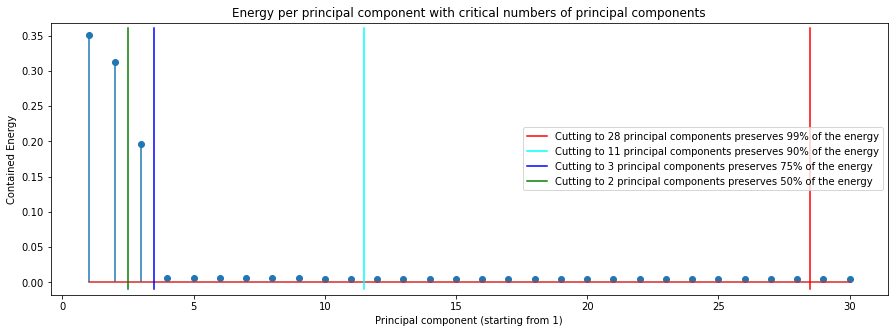

In [5]:
# calculate energies
e_svd = sigma / sum(sigma)

# plot energies
fig, ax = plt.subplots(figsize=(15,5))
y_pos = np.arange(len(e_svd))+1# the +1 allows to display pcs starting from 1

ax.stem(y_pos, e_svd, use_line_collection=True)
ax.axvline(x=num_pc_crit+0.5, ymin=0.02, ymax=0.98, color='red', label='Cutting to '+str(num_pc_crit)+' principal components preserves 99% of the energy')
ax.axvline(x=num_pc_crit_90+0.5, ymin=0.02, ymax=0.98, color='cyan', label='Cutting to '+str(num_pc_crit_90)+' principal components preserves 90% of the energy')
ax.axvline(x=num_pc_crit_75+0.5, ymin=0.02, ymax=0.98, color='blue', label='Cutting to '+str(num_pc_crit_75)+' principal components preserves 75% of the energy')
ax.axvline(x=num_pc_crit_50+0.5, ymin=0.02, ymax=0.98, color='green', label='Cutting to '+str(num_pc_crit_50)+' principal components preserves 50% of the energy')
ax.set_xlabel('Principal component (starting from 1)')
ax.set_ylabel('Contained Energy')
ax.set_title('Energy per principal component with critical numbers of principal components')
ax.legend(loc='best')
plt.show()

In [6]:
i = 2 # number of desired PCs
# project the data on the first i PCs
X_projected = X.dot(VT.T[:, :i])

# reconstruct the data with the first i PCs
U_trunc = U[:,:i]
Sigma_trunc = Sigma[:i, :i]
V_trunc = VT[:i,:]
X_trunc = U_trunc @ Sigma_trunc @ V_trunc

# check the ddifferent dimensions of projection and reconstruction
print('Shape X_projected: '+str(np.shape(X_projected)))
print('Shape X_trunc: '+str(np.shape(X_trunc)))

Shape X_projected: (1000, 2)
Shape X_trunc: (1000, 30)


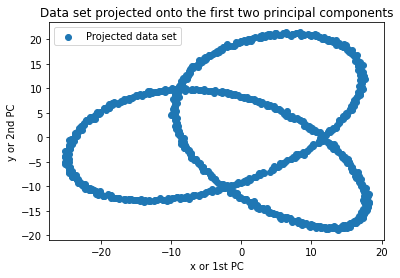

In [7]:
# plot the projected data where the two principal components are interpreted as coordinates
plt.scatter(X_projected[:, 0], X_projected[:, 1], label='Projected data set')
plt.title('Data set projected onto the first two principal components')
plt.xlabel('x or 1st PC')
plt.ylabel('y or 2nd PC')
plt.legend();

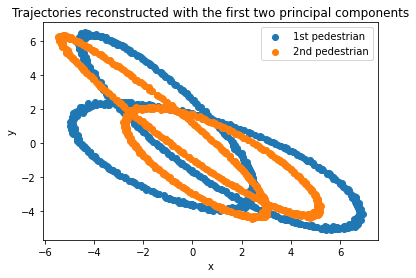

In [8]:
# plot the trajectories of the first two pedestrians
plt.scatter(X_trunc[:, 0], X_trunc[:, 1], label='1st pedestrian')#pedestrian 1
plt.scatter(X_trunc[:, 2], X_trunc[:, 3], label='2nd pedestrian')#pedestrian 2
plt.title('Trajectories reconstructed with the first two principal components')
plt.xlabel('x')
plt.ylabel('y')
plt.legend();

In [9]:
# Mean squared error between original data and reconstructed data
print("MSE = %.6f " %(np.mean((X - X_trunc)**2)))

MSE = 1.889770 


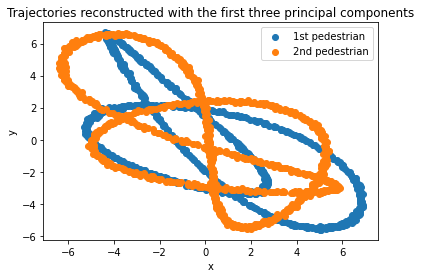

In [10]:
i = 3 # number of desired PCs
# reconstruct the data with the first i PCs
U_trunc = U[:,:i]
Sigma_trunc = Sigma[:i, :i]
V_trunc = VT[:i,:]
X_trunc = U_trunc @ Sigma_trunc @ V_trunc

# plot the trajectories of the first two pedestrians (this time with 3 PCs)
plt.scatter(X_trunc[:, 0], X_trunc[:, 1], label='1st pedestrian')#pedestrian 1
plt.scatter(X_trunc[:, 2], X_trunc[:, 3], label='2nd pedestrian')#pedestrian 2
plt.title('Trajectories reconstructed with the first three principal components')
plt.xlabel('x')
plt.ylabel('y')
plt.legend();

In [11]:
# Mean squared error between original data and reconstructed data
print("MSE = %.6f " %(np.mean((X - X_trunc)**2)))

MSE = 0.035964 
